# Module74 Clustering Ass 3

Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.

A1. Clustering is an unsupervised machine learning technique used to group similar data points together based on some similarity measure. The goal is to identify patterns and discover structures within data.

### Applications of Clustering:

1.) **Customer Segmentation:** Businesses segment customers based on behavior, purchase history, or demographics.

2.) **Anomaly Detection:** Detecting fraud in credit card transactions or network security breaches.
Image Segmentation: Identifying different objects in an image.

3.) **Medical Diagnosis:** Grouping patients with similar symptoms for better diagnosis and treatment.

4.) **Document Clustering:** Organizing large collections of text into meaningful topics.

Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and
hierarchical clustering?

A2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups data points based on density. Unlike K-Means, it does not require specifying the number of clusters in advance.

Key diferences are :

## 1.) DBSCAN

Cluster shape - Detects arbitrary shapes

Noise handling - Can identify outliers

No. of Clusters - No need to predefine K

Works with varying density - Yes

Scalability - Slower for large datasets


## 2.) K-Means

Cluster shape - Assumes spherical clusters

Noise handling - Sensitive to noise

No. of Clusters - Requires specifying K

Works with varying density - No

Scalability - Fast for large datasets


## 3.) Heirarchical

Cluster shape - Can find nested clusters

Noise handling - Limited outlier detection

No. of Clusters - Can be determined from dendrogram

Works with varying density - Partially

Scalability - Computationally expensive




Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN
clustering?

A3. Choosing the optimal Epsilon and Min points in DBSCAN :

1.) **Epsilon (ε)** - Maximum distance between points in a cluster:

Use a **k-distance plot**:

Compute the distance of each point to its k-th nearest neighbor (usually **k = MinPts**).

Plot these distances in ascending order.

The elbow point of the curve is the optimal ε value.

2.) **MinPts (Minimum Points per Cluster):**

General heuristic: **MinPts ≈ 2 × (number of dimensions in the dataset)**.

Too small → **Identifies noise as clusters**.

Too large → **Merges distinct clusters**.


Q4. How does DBSCAN clustering handle outliers in a dataset?

A4. DBSCAN categorizes points into:

1.) **Core points:** Have at least MinPts neighbors within ε.

2.) **Border points:** Have fewer than MinPts neighbors but are reachable from a core point.

3.) **Noise points (Outliers):** Do not belong to any cluster.

Outliers appear as noise points that are not part of any dense region. Unlike K-Means, DBSCAN **does not force every point into a cluster**.



Q5. How does DBSCAN clustering differ from k-means clustering?

A5. DBSCAN Differs from K-Means by:

1.) **Cluster Shape Handling:**

K-Means assumes spherical clusters, while DBSCAN detects arbitrarily shaped clusters.


2.) **Number of Clusters:**

K-Means requires predefined K, DBSCAN automatically finds clusters.

3.) **Noise Handling:**

K-Means forces all points into clusters, while DBSCAN identifies outliers as noise.

4.) **Scalability:**

DBSCAN is **slower on large datasets** due to pairwise distance calculations.


Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are
some potential challenges?

A6. Yes, but there are challenges:

1.) **Curse of Dimensionality:** Euclidean distance becomes less meaningful in high-dimensional space.

2.) **Sparse Data:** High dimensions make density-based methods struggle to differentiate points.

3.) **Alternative Distance Measures:**

**Cosine Similarity** or Mahalanobis Distance can be used instead of Euclidean.

**PCA or t-SNE** can reduce dimensions before applying DBSCAN.

Q7. How does DBSCAN clustering handle clusters with varying densities?

A7. DBSCAN Handles Clusters with Varying Densities :

**Strength:** Can detect clusters of different densities.

**Limitation:** A single ε value may not work well if densities vary significantly.

**Solution:** Use OPTICS (Ordering Points To Identify Clustering Structure), an improvement of DBSCAN that adapts to varying densities.


Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?

A8. Since DBSCAN doesn’t assume predefined clusters, standard K-Means metrics (e.g., inertia) don’t work. Instead, we use:

1.) **Silhouette Score:** Measures how well-separated clusters are.

2.) **Adjusted Rand Index (ARI):** Compares clustering with ground truth labels.

3.) **Davies-Bouldin Index:** Measures how compact and well-separated clusters are.

4.) **Cluster Purity:** Measures homogeneity of each cluster.


Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?

A9. Yes! DBSCAN can identify high-confidence samples (core points) and leave outliers/noise as unknown.

These labeled clusters can be used as pseudo-labels in semi-supervised learning models.

Useful for low-data scenarios like fraud detection and biomedical research.


Q10. How does DBSCAN clustering handle datasets with noise or missing values?

A10.  DBSCAN Handles Noise or Missing Values by following ways:

1.) **Noise Handling:**

DBSCAN automatically marks noisy points that don’t belong to any cluster.

These points can be removed or analyzed separately.

2.) **Missing Values:**

DBSCAN does not handle missing values directly.

Common approaches:

**Imputation** (e.g., mean/mode replacement).

**KNN-based imputation** to estimate missing values.

**Removing incomplete records** (if data is large enough).


Q11. Implement the DBSCAN algorithm using a python programming language, and apply it to a sample
dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.

A11. Implementing DBSCAN Algorithm below:

In [1]:
# Step1 - Loading and preprocess data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # True labels (for reference)

# Standardize the dataset (DBSCAN is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


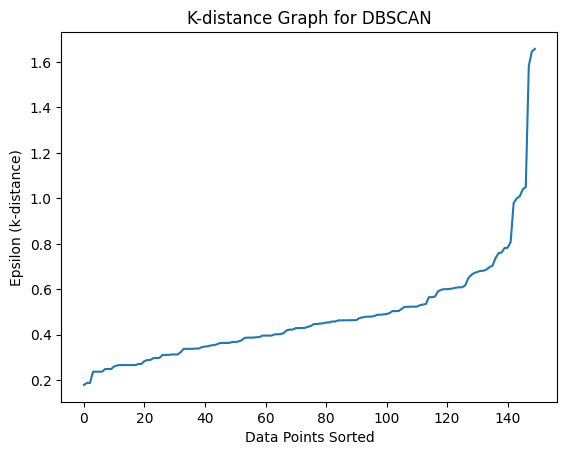

In [2]:
# Step2: Applying DBSCAN

from sklearn.neighbors import NearestNeighbors
# Find optimal epsilon using k-distance plot
k = 4  # MinPts is often set to 2 * number of dimensions (4 features here)
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, k-1])  # Sort distances of k-th nearest neighbor

# Plot k-distance graph
plt.plot(distances)
plt.xlabel("Data Points Sorted")
plt.ylabel("Epsilon (k-distance)")
plt.title("K-distance Graph for DBSCAN")
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=4)
clusters = dbscan.fit_predict(X_scaled)

# Add clustering labels to a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df["Cluster"] = clusters
df["True_Label"] = y


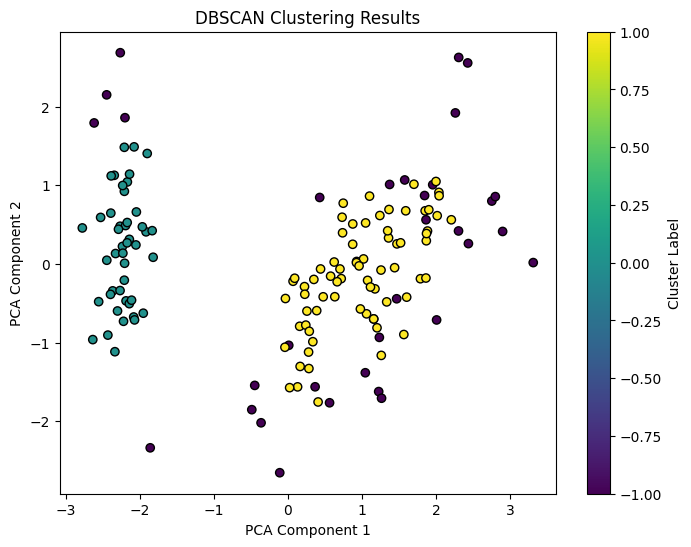

In [3]:
# Step3: Visualize Clustering

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of DBSCAN clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", edgecolors="k")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering Results")
plt.colorbar(label="Cluster Label")
plt.show()


In [4]:
# Step4: Interpretation of Clusters

# Count number of points in each cluster
print(pd.Series(clusters).value_counts())


 1    72
 0    45
-1    33
Name: count, dtype: int64


### Discussion of Results:

1.) If DBSCAN correctly detects 3 clusters, it aligned well with the known species in the Iris dataset.

2.) If it creates more or fewer clusters, we may need to adjust ε or MinPts.

3.) Noise points (if many exist) indicate that DBSCAN is filtering out non-dense regions.
